In [24]:
#Libraries
import pandas as pd # data processing
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [25]:
# Load the dataset from Google Drive
df = pd.read_csv("/content/drive/MyDrive/Adult-income-dataset.csv")

# Display the first few rows of the dataset
df.head()

,Age,Workclass,fnlwgt,Education,EducationNum,Maritalstatus,Occupation,Relationship,Race,Gender,CapitalGain,CapitalLoss,Hoursperweek,Nativecountry,Income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [26]:
#checking the columns names insode the data file
df.columns

Index(['Age', 'Workclass', 'fnlwgt', 'Education', 'EducationNum',
       'Maritalstatus', 'Occupation', 'Relationship', 'Race', 'Gender',
       'CapitalGain', 'CapitalLoss', 'Hoursperweek', 'Nativecountry',
       'Income'],
      dtype='object')

In [27]:
#cheching the data inside the file
print ("Adult Dataset Length :",len(df))
#checking the data using shape
print ("Adult Dataset Shape : ",df.shape)

Adult Dataset Length : 48842
Adult Dataset Shape :  (48842, 15)


In [28]:
#find total num of entries & counts non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Age            48842 non-null  int64 
 1   Workclass      48842 non-null  object
 2   fnlwgt         48842 non-null  int64 
 3   Education      48842 non-null  object
 4   EducationNum   48842 non-null  int64 
 5   Maritalstatus  48842 non-null  object
 6   Occupation     48842 non-null  object
 7   Relationship   48842 non-null  object
 8   Race           48842 non-null  object
 9   Gender         48842 non-null  object
 10  CapitalGain    48842 non-null  int64 
 11  CapitalLoss    48842 non-null  int64 
 12  Hoursperweek   48842 non-null  int64 
 13  Nativecountry  48842 non-null  object
 14  Income         48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [29]:
# Replace "?" with NaN
df.replace('?', np.nan, inplace=True)


In [30]:
# Checking for missing values
print("Missing values per column before cleaning:")
df.isnull().sum()

Missing values per column before cleaning:


,0
Age,0
Workclass,2799
fnlwgt,0
Education,0
EducationNum,0
Maritalstatus,0
Occupation,2809
Relationship,0
Race,0
Gender,0


In [31]:
# Handling missing values by dropping them
df.dropna(inplace=True)

# Checking again after removal
print("Missing values per column after cleaning:")
df.isnull().sum()

Missing values per column after cleaning:


,0
Age,0
Workclass,0
fnlwgt,0
Education,0
EducationNum,0
Maritalstatus,0
Occupation,0
Relationship,0
Race,0
Gender,0


In [32]:
# Grouping marital status
df["Maritalstatus"] = df["Maritalstatus"].replace({
    "Married-civ-spouse": "Married",
    "Married-AF-spouse": "Married",
    "Married-spouse-absent": "Married",
    "Never-married": "Single",
    "Divorced": "Separated",
    "Separated": "Separated",
    "Widowed": "Separated"
})

#Chicking the Marital status values AFTER Replacing
df['Maritalstatus'].value_counts()

,count
Maritalstatus,
Married,21639
Single,14598
Separated,8985


In [33]:
# Grouping education levels
df["Education"] = df["Education"].replace({
    "Preschool": "School",
    "1st-4th": "School",
    "5th-6th": "School",
    "7th-8th": "School",
    "9th": "High-School",
    "10th": "High-School",
    "11th": "High-School",
    "12th": "High-School",
    "HS-grad": "High-School",
    "Some-college": "College",
    "Assoc-acdm": "College",
    "Assoc-voc": "College",
    "Bachelors": "Bachelors",
    "Masters": "Masters",
    "Doctorate": "Doctorate",
    "Prof-school": "Doctorate"
})

#Chicking the Education values AFTER Replacing
df['Education'].value_counts()

,count
Education,
High-School,18878
College,13365
Bachelors,7570
Masters,2514
School,1566
Doctorate,1329


In [34]:
# Renaming columns in a single call
df.rename(columns={
    'Hoursperweek': 'Working_Hours',
    'Nativecountry': 'Country',
    'Maritalstatus': 'Marital-Status',
    'Income': 'Salary',
}, inplace=True)

# Assigning the renamed dataframe to a new variable AdultDataset
AdultDataset = df

# Display the renamed DataFrame
#AdultDataset

# **Data visualisation**

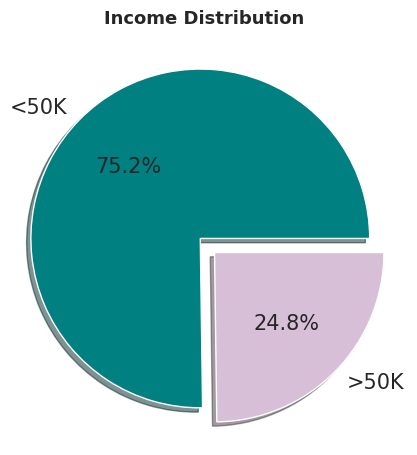

In [35]:
#A pie chart for income has < or > 50K
explode = (0.13,0)  #Slicing the perticulator part
fig1, ax1 = plt.subplots(figsize=(8,5))# Create plot with specific size

fig1.suptitle('Income Distribution',fontsize=13, fontweight="bold")


# Pie chart for Salary (<50K vs >50K)

ax1.pie(AdultDataset['Salary'].value_counts(),#getting data columns
        explode=explode,
        labels=['<50K','>50K'], # giving labels
        autopct='%1.1f%%',  # Shows persentage data for 1 decimal points
        radius=1.1,  # Control size of the pie chart
        colors=['teal', 'thistle'],  # Color for each slice
        textprops={"fontsize": 15},  # Font size of labels
        shadow=True)  # Adds shadow effect

plt.show()# This ensures only the graph is displayed

<Figure size 1200x1200 with 0 Axes>

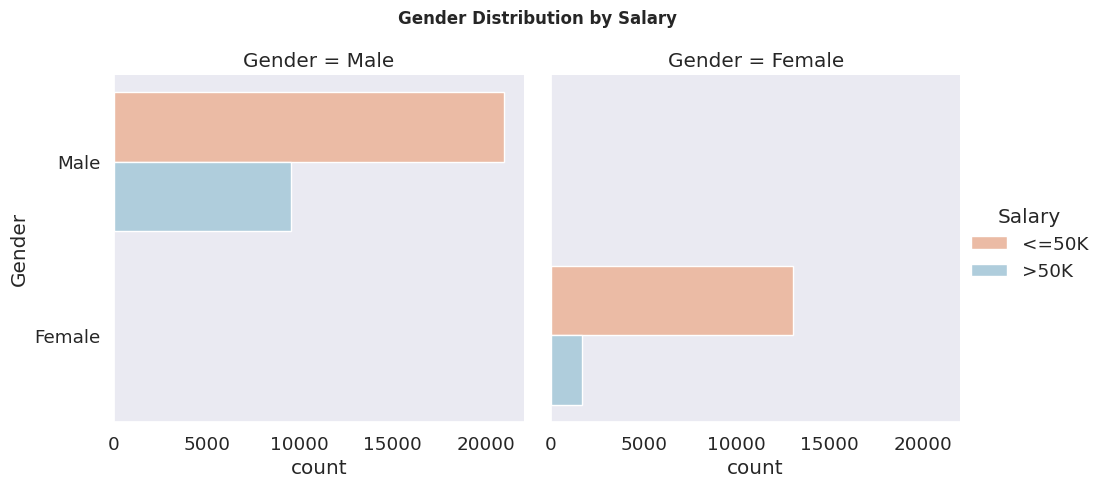

In [36]:
plt.figure(figsize=(12, 12))  # Graph size
plt.rcParams['font.family'] = 'Tahoma'  # Font style
sns.set(style="dark", font_scale=1.20)  # Font size and grid style

# Creating categorical plot
g = sns.catplot(
    data=AdultDataset,
    y="Gender",  # Sets Gender as the categorical variable on the Y-axis
    hue="Salary",  # Differentiates bars by Salary levels using different colors
    kind="count",  # Plots the count (frequency) of each Gender category
    col="Gender",  # Creates separate subplots for each Gender category
    palette="RdBu"# Color scheme for the plot
)


# Adding a title with spacing
g.fig.suptitle("Gender Distribution by Salary", fontsize=12, fontweight="bold")
g.fig.subplots_adjust(top=0.85)  # Adjusts space between title and graph

plt.show()  # Display the graph

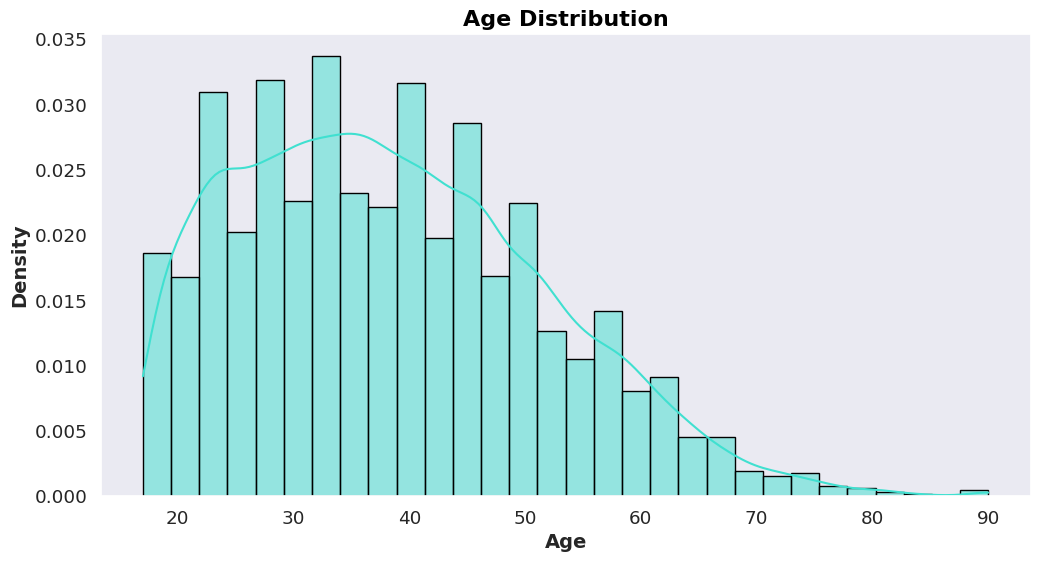

In [37]:
# Set the figure size
plt.figure(figsize=(12, 6))

sns.histplot(
    AdultDataset['Age'],
    bins=30,
    kde=True,
    color='turquoise',  # Color for histogram bars
    stat="density",  # Normalizes the histogram to represent a probability density
    edgecolor='black'  # Adds black edges around the bars

)
# Add a title with styling
plt.title('Age Distribution', fontsize=16, fontweight='bold', color='black')

# Add labels for X and Y axes
plt.xlabel('Age', fontsize=14, fontweight='bold')
plt.ylabel('Density', fontsize=14, fontweight='bold')

# Show the plot
plt.show()

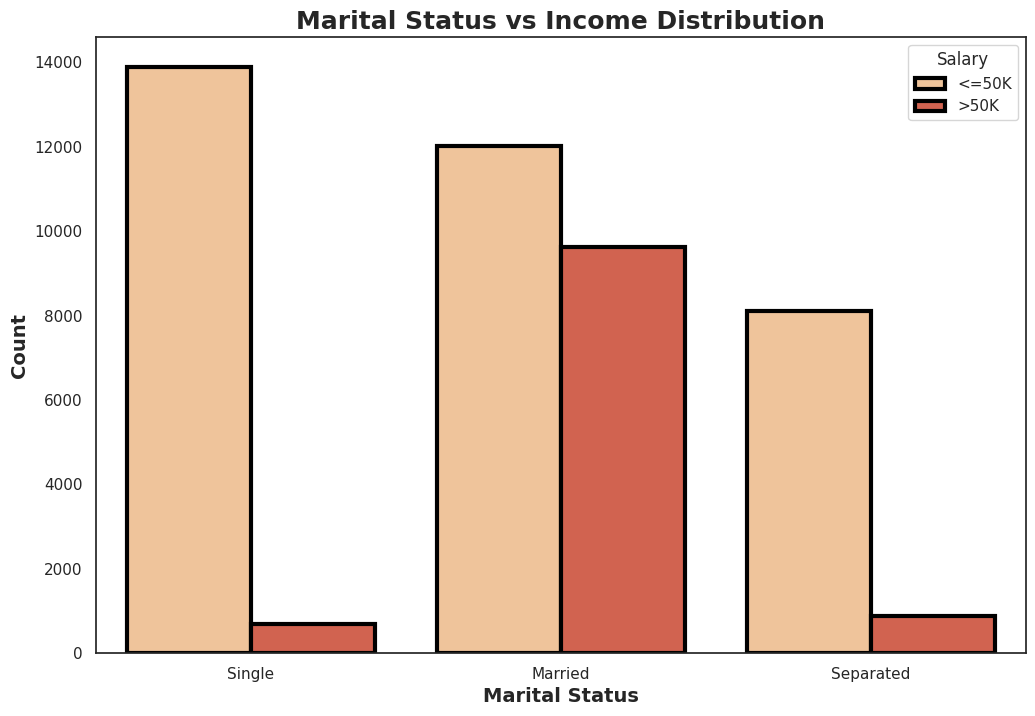

In [38]:
# Bar Graph Plot for the Marital-Status
plt.figure(figsize=(12, 8))  # Graph size
plt.rcParams['font.family'] = 'sans-serif'  # Font style
sns.set(style="white", font_scale=1)  # Font size and grid style

# Creating the count plot
G = sns.countplot(
    AdultDataset,
    x='Marital-Status',  # x-axis: Marital Status
    hue='Salary',  # Split bars by Salary category
    edgecolor=(0, 0, 0),  # Border color for the bars
    linewidth=3,  # Line width for the borders
    palette="OrRd"  # Color palette for the plot
)

# Adding title with enhanced styling
plt.title('Marital Status vs Income Distribution', fontsize=18, fontweight='bold')

# Adding axis labels
plt.xlabel('Marital Status', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')

# Show the plot
plt.show()



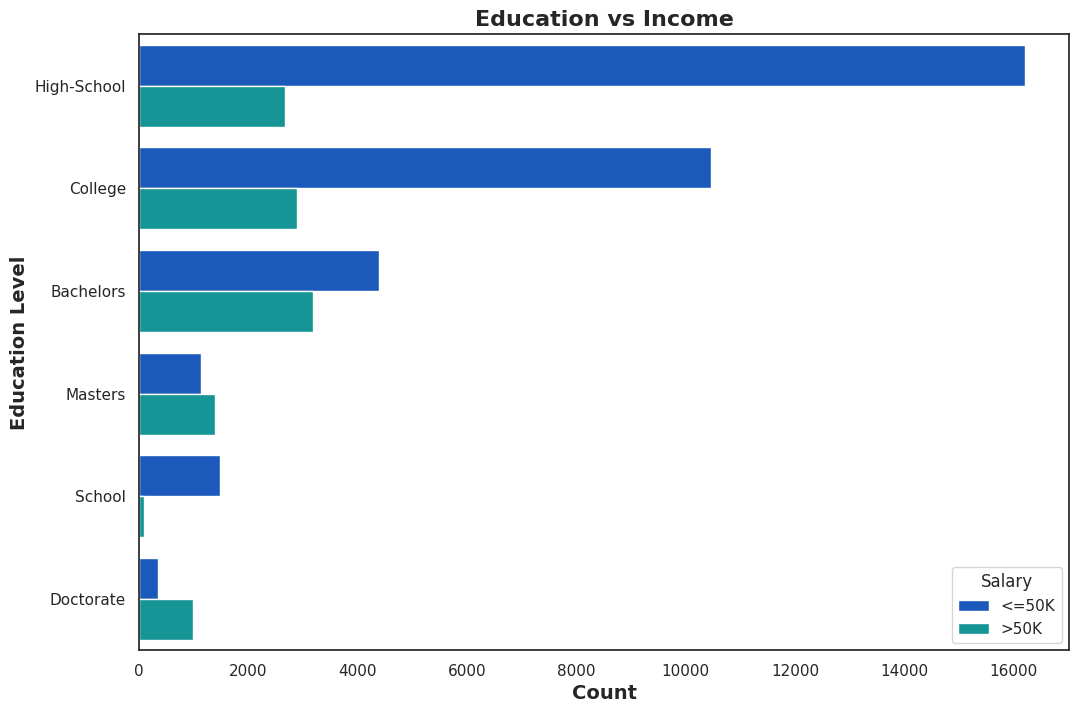

In [39]:
# Bar plot showing income by levels of education
plt.figure(figsize=(12, 8))  # Set graph size
plt.rcParams['font.family'] = 'sans-serif'  # Font style

# Create the count plot for Education vs Salary
sns.countplot(
    y='Education',  # Education level on the y-axis
    hue='Salary',  # Split by salary category (<=50K or >50K)
    data=AdultDataset,  # The dataset to use
    order=AdultDataset['Education'].value_counts().index,  # Order by most common education levels
    palette='winter'  # Color palette for visual appeal
)

# Adding a title and labels
plt.title('Education vs Income', fontsize=16, fontweight='bold')
plt.xlabel('Count', fontsize=14, fontweight='bold')
plt.ylabel('Education Level', fontsize=14, fontweight='bold')

# Display the plot
plt.show()


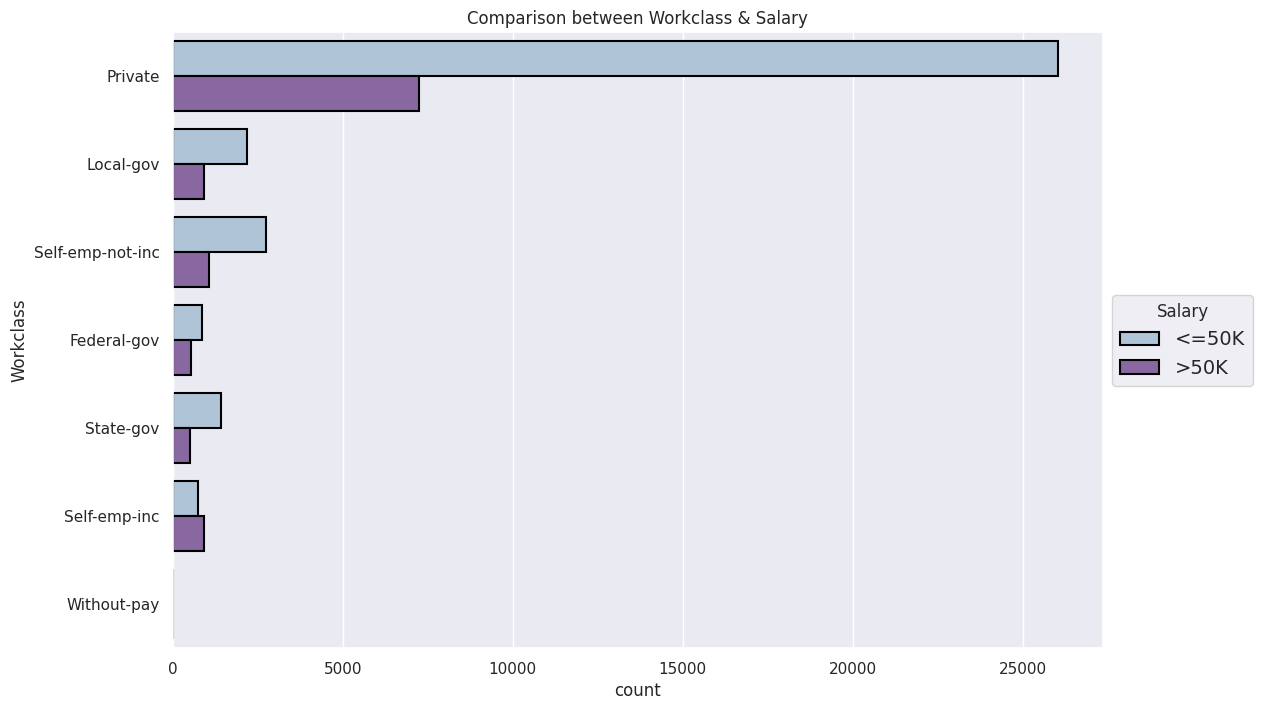

In [40]:
# Workclass vs Salary Comparison
plt.rcParams['font.size'] = 30  # Set font size for labels and title
plt.figure(figsize=(12,8))  # Set graph size (width, height)
plt.rcParams['font.family'] = 'cursive'  # Set font style to cursive
sns.set(style="darkgrid")  # Set background style to dark grid

# Set title for the graph
plt.title('Comparison between Workclass & Salary')

# Create a count plot showing Workclass vs Salary
sns.countplot(
    data=AdultDataset,  # Data to plot
    y="Workclass",  # Category on the y-axis (Workclass)
    hue="Salary",  # Differentiate by Salary categories (<=50K or >50K)
    edgecolor=(0, 0, 0),  # Border color for the bars
    linewidth=1.5,  # Border line weight
    palette="BuPu"  # Color palette for the bars
)

# Move the legend to the right side of the plot
plt.legend(title='Salary', loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)

# Display the plot
plt.show()


In [41]:
# Saving'AdultDataset' to a CSV file
AdultDataset.to_csv('/content/drive/MyDrive/final_adult_dataset.csv', index=False)